In [1]:
#Hyperparameter tuning using only reconstruction loss for all hyperparameters other than number of hidden layers and dropout
#rate
from tensorflow.keras import Sequential
from keras.layers import *
from keras.losses import MeanSquaredLogarithmicError
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.constraints import MaxNorm
import random
from tensorflow.keras.callbacks import EarlyStopping

#read train data
data_path = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_train_data.xlsx'
df_normal = pd.read_excel(data_path,sheet_name='Train')
X = df_normal.drop(['target'], axis=1)
print(X.shape)

#scale train data
scaler = MinMaxScaler()
scaler.fit(X)
data = scaler.transform(X)

#define range of hyperparameter values for each hyperparameter
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint2 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint3 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint4 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint5 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint6 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint7 = [1.0, 2.0, 3.0, 4.0, 5.0]
weight_constraint8 = [1.0, 2.0, 3.0, 4.0, 5.0]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
change_neurons = [-3,-2,-1,0,1,2,3]
init_mode = ['he_normal', 'he_uniform']

#choose a random combination of hyperparameter values 20 times
recon_loss_list = []
hyperparameter_sets = []
count=0
while count<20:
    wc = random.choice(weight_constraint)
    wc2 = random.choice(weight_constraint2)
    wc3 = random.choice(weight_constraint3)
    wc4 = random.choice(weight_constraint4)
    wc5 = random.choice(weight_constraint5)
    wc6 = random.choice(weight_constraint6)
    wc7 = random.choice(weight_constraint6)
    wc8 = random.choice(weight_constraint6)
    batch_s = random.choice(batch_size)
    ep = random.choice(epochs)
    im = random.choice(init_mode)
    cn = []
    for i in range(8):
        cn.append(random.choice(change_neurons))
    
    #Check if hyperparameter set was used before with this number of dense layers
    hyperparameter_set = [wc,wc2,wc3,wc4,wc5,wc6,wc7,wc8,batch_s,ep,im,cn]
    
    count_set = hyperparameter_sets.count(hyperparameter_set)
    print(count_set)
    
    if count_set > 0:
        
        continue
        
    else:
        
        hyperparameter_sets.append(hyperparameter_set)
    
    recon_loss = 0
    
    #for the current combination of hyperparameter values selected, run the Autoencoder 3 times and average the results
    for j in range(3):
        
        callback = tf.keras.callbacks.EarlyStopping(monitor='binary_crossentropy', patience=3)
        
        #Autoencoder
        encoder = Sequential()
        encoder.add(Input(shape=(25,)))
        encoder.add(Dense(16+cn[0],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc)))
        encoder.add(Dropout(0.1))
        encoder.add(Dense(13+cn[1],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc2)))
        encoder.add(Dropout(0.1))
        encoder.add(Dense(10+cn[2],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc3)))
        encoder.add(Dropout(0.1))
        encoder.add(Dense(4+cn[3],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc4)))

        decoder = Sequential()
        decoder.add(Dense(6+cn[4],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc5)))
        decoder.add(Dropout(0.1))
        decoder.add(Dense(10+cn[5],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc6)))
        decoder.add(Dropout(0.1))
        decoder.add(Dense(13+cn[6],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc7)))
        decoder.add(Dropout(0.1))
        decoder.add(Dense(18+cn[7],activation='relu',kernel_initializer=im, kernel_constraint=MaxNorm(wc8)))
        decoder.add(Dropout(0.1))
        decoder.add(Dense(25,activation='sigmoid'))

        autoencoder = Sequential([encoder,decoder])
        autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.losses.BinaryCrossentropy()]) #FILL IN BRACKETS
        autoencoder.fit(data,data, batch_size=batch_s, epochs=ep, verbose=0, callbacks=[callback])

        #predict on train data and calculate and store reconstruction loss value in recon_loss_list
        pred_data_norm = autoencoder.predict(data)
        reconstruction_error_norm_AUTO = tf.keras.losses.BinaryCrossentropy()
        recon_loss += reconstruction_error_norm_AUTO(pred_data_norm,data).numpy()
    
    #average reconstruction loss
    recon_loss = recon_loss/3
    
    print("+1")
    recon_loss_list.append(recon_loss)
    count+=1

#select the lowest recon value and the hyperparameter set that provided this value
lowest_recon = min(recon_loss_list)
lowest_recon_hyperparameter_set = hyperparameter_sets[recon_loss_list.index(lowest_recon)]

print(len(recon_loss_list))
print("Lowest reconstruction loss: ")
print(lowest_recon)
print("Lowest reconstruction loss hyperparameter set: ")
print(lowest_recon_hyperparameter_set)

(10027, 25)
0
314/314 [==============================] - 1s 1ms/step
+1
0
314/314 [==============================] - 1s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [==============================] - 0s 1ms/step
+1
0
314/314 [=================

(10027, 25)
0
76/76 [==============================] - 0s 1ms/step
0.7494447243791714
+1
0
76/76 [==============================] - 0s 1ms/step
0.7484169235597923
+1
0
76/76 [==============================] - 0s 1ms/step
0.74909487153792
+1
0
76/76 [==============================] - 0s 1ms/step
0.7497102816575083
+1
0
76/76 [==============================] - 0s 1ms/step
0.7493455018348577
+1
0
76/76 [==============================] - 0s 1ms/step
0.7494598515870278
+1
0
76/76 [==============================] - 0s 1ms/step
0.7494128312840581
+1
0
76/76 [==============================] - 0s 1ms/step
0.7496435100816613
+1
0
76/76 [==============================] - 0s 1ms/step
0.7494528678490647
+1
0
76/76 [==============================] - 0s 1ms/step
0.7497993844470066
+1
[[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.32753623188405795, 0.9010989010989011], [0.7817805383022775, 0.7912087912087912], [0.8881987577639752, 0.7802197802197802], [0.8910973084886128, 0.49450549450

Accuracy & Recall by threshold:
[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.28902691511387163, 0.9230769230769231], [0.768944099378882, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]]


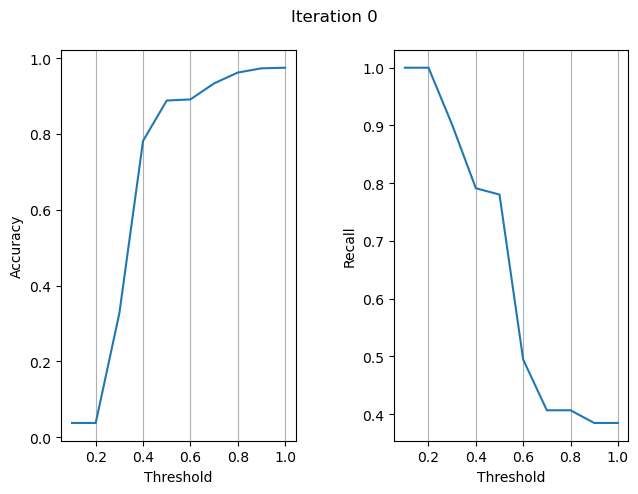

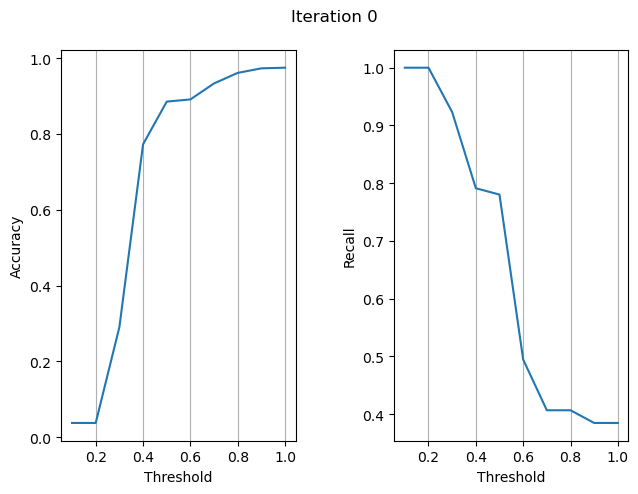

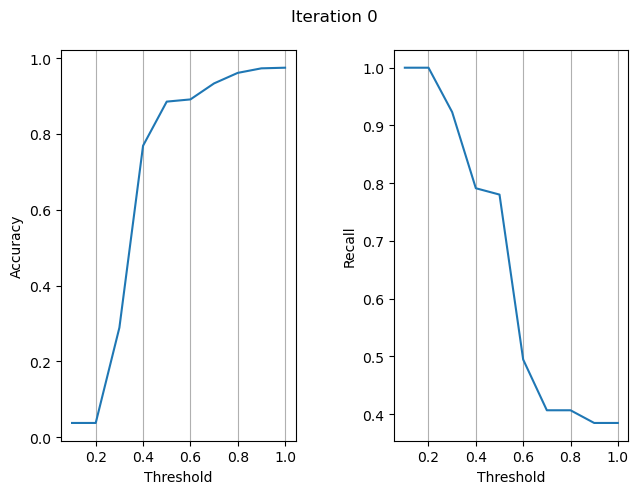

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.30351966873706004, 0.9010989010989011], [0.770600414078675, 0.7912087912087912], [0.8877846790890269, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.28902691511387163, 0.9230769230769231], [0.770600414078675, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3445134575569358, 0.8901098901098901], [0.7821946169772257, 0.7912087912087912], [0.8873706004140787, 0.7692307692307693], [0.8910973084886128, 0.4

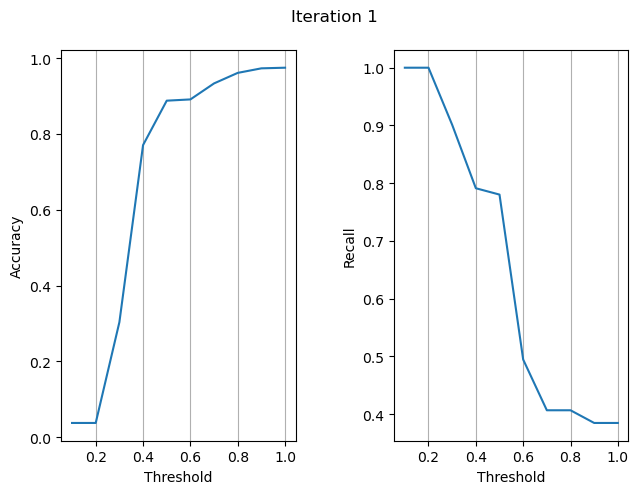

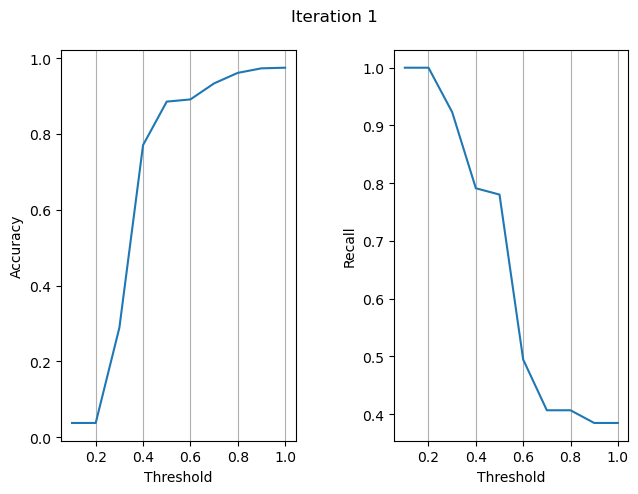

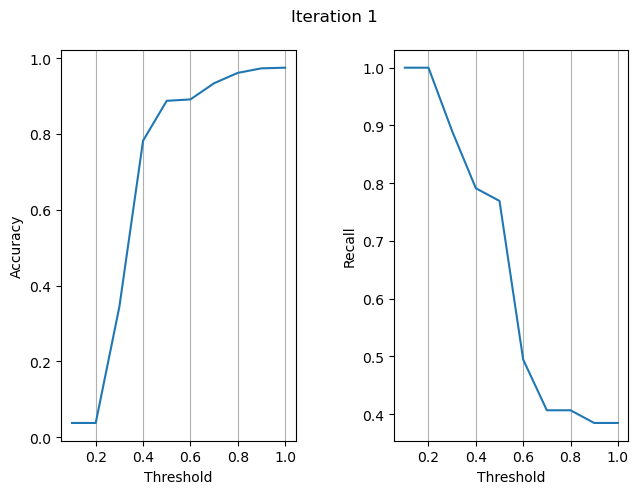

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.32919254658385094, 0.9010989010989011], [0.7821946169772257, 0.7912087912087912], [0.8890269151138717, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9631469979296067, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.28322981366459626, 0.9230769230769231], [0.7656314699792961, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3039337474120083, 0.9230769230769231], [0.7780538302277433, 0.7912087912087912], [0.8877846790890269, 0.7802197802197802], [0.8910973084886128, 0

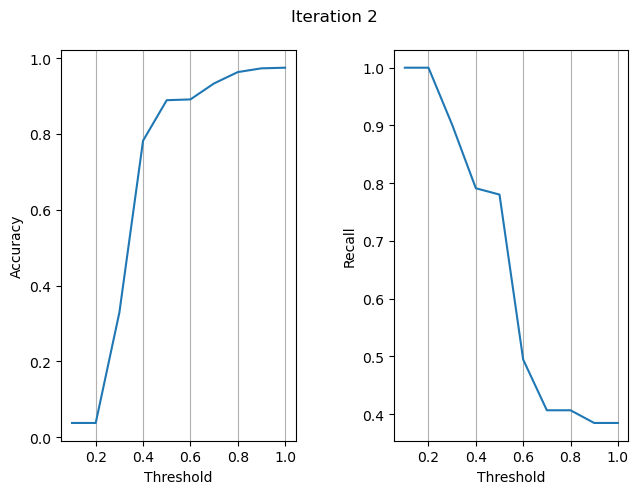

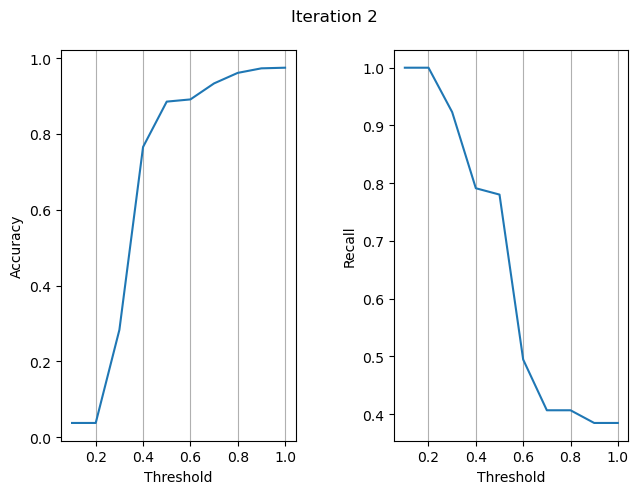

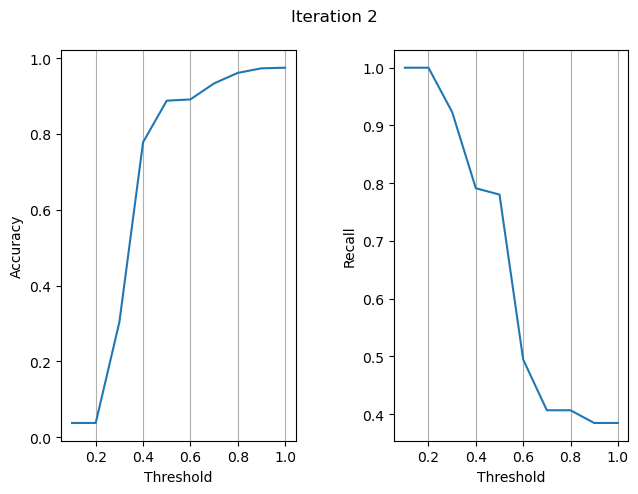

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.2865424430641822, 0.9230769230769231], [0.7681159420289855, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.30351966873706004, 0.9230769230769231], [0.7768115942028986, 0.7912087912087912], [0.8877846790890269, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9619047619047619, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.30973084886128366, 0.9010989010989011], [0.7768115942028986, 0.7912087912087912], [0.8877846790890269, 0.7802197802197802], [0.8910973084886128, 0

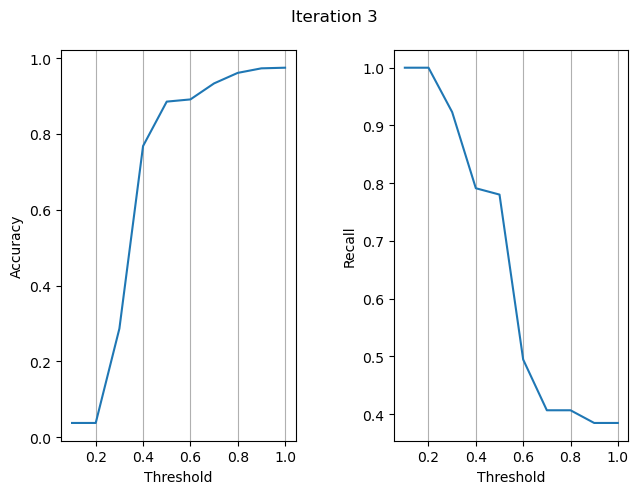

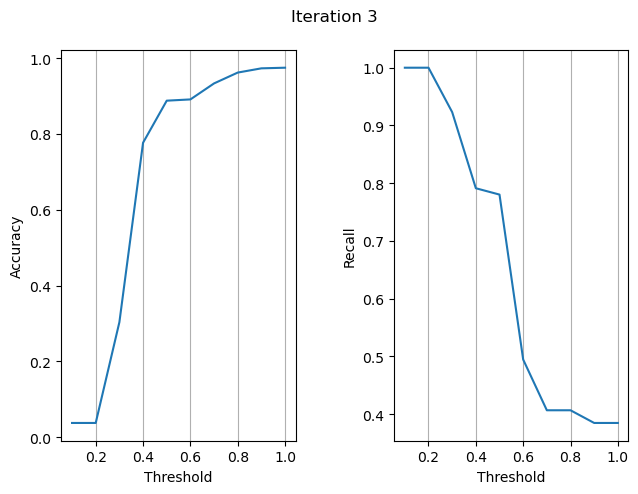

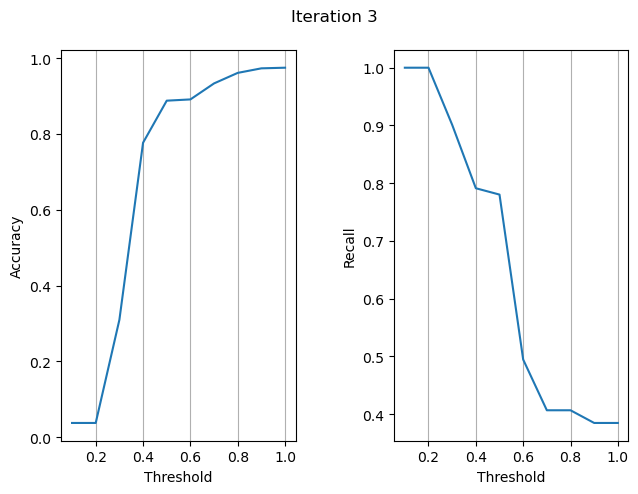

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.2753623188405797, 0.9230769230769231], [0.7527950310559006, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9598343685300207, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3167701863354037, 0.9010989010989011], [0.7788819875776397, 0.7912087912087912], [0.8877846790890269, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3134575569358178, 0.9010989010989011], [0.779296066252588, 0.7912087912087912], [0.8865424430641822, 0.7802197802197802], [0.8910973084886128, 0.49

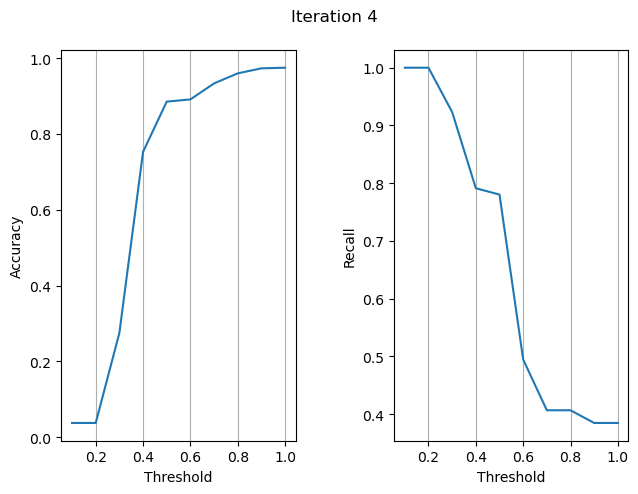

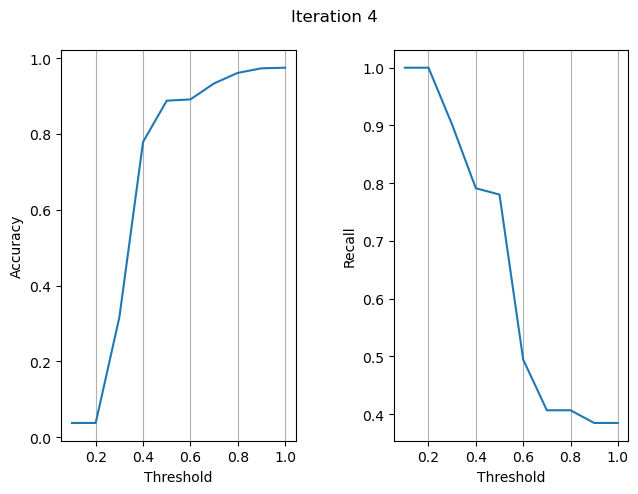

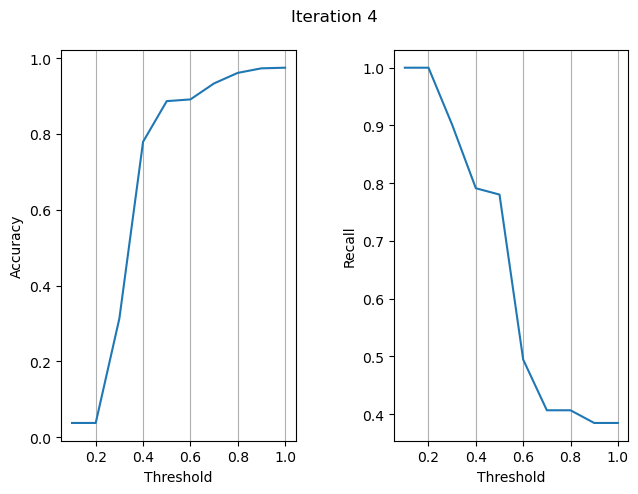

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.29233954451345756, 0.9230769230769231], [0.7726708074534161, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.28778467908902694, 0.9230769230769231], [0.7726708074534161, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3279503105590062, 0.9010989010989011], [0.7813664596273292, 0.7912087912087912], [0.8873706004140787, 0.7692307692307693], [0.8910973084886128, 0

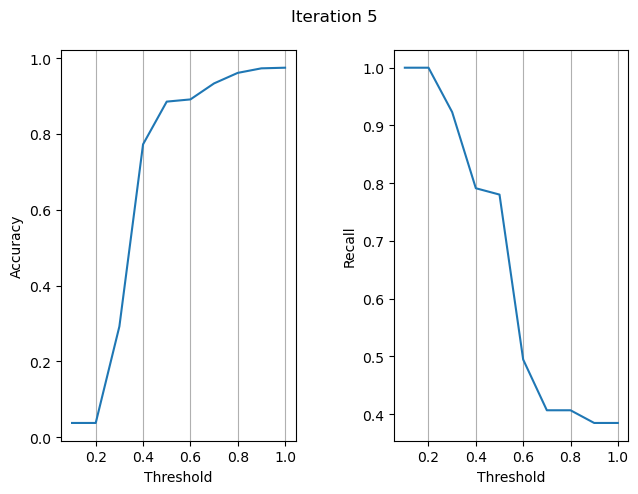

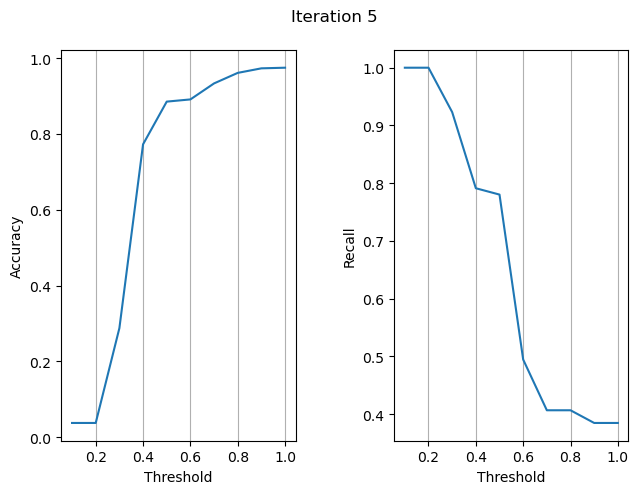

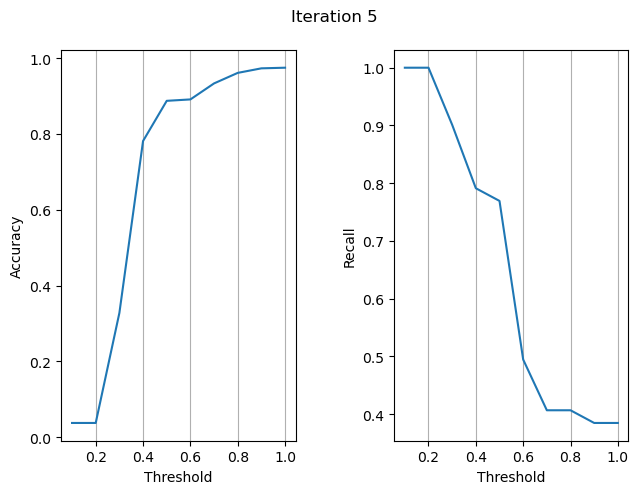

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.29648033126293993, 0.9230769230769231], [0.7730848861283643, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.2873706004140787, 0.9230769230769231], [0.7718426501035197, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.2753623188405797, 0.9230769230769231], [0.7511387163561076, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.

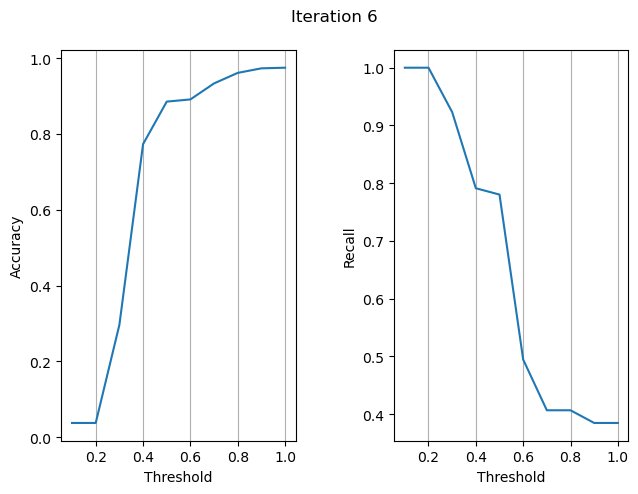

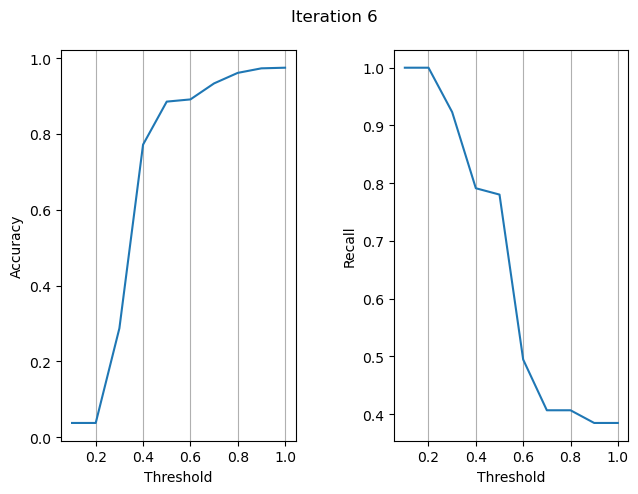

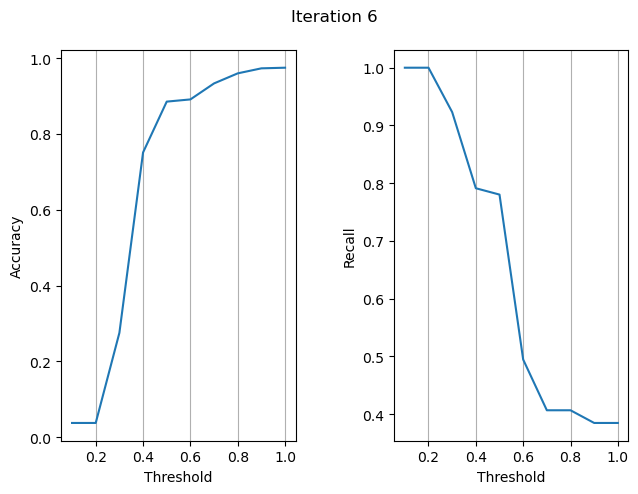

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.29233954451345756, 0.9230769230769231], [0.7730848861283643, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.29440993788819875, 0.9230769230769231], [0.7763975155279503, 0.7912087912087912], [0.8865424430641822, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3167701863354037, 0.9010989010989011], [0.780952380952381, 0.7912087912087912], [0.8877846790890269, 0.7692307692307693], [0.8910973084886128, 0.

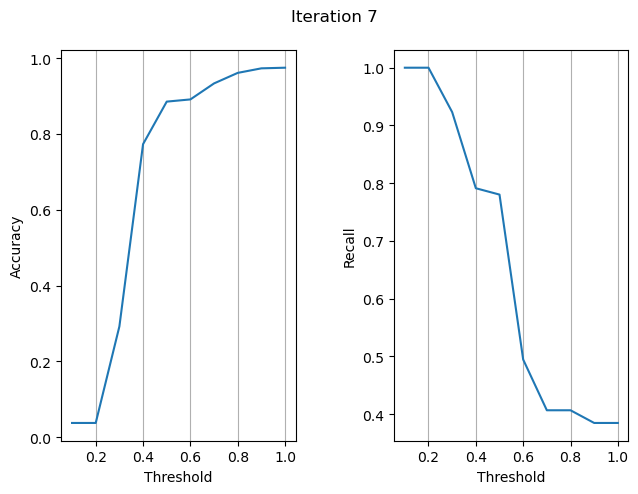

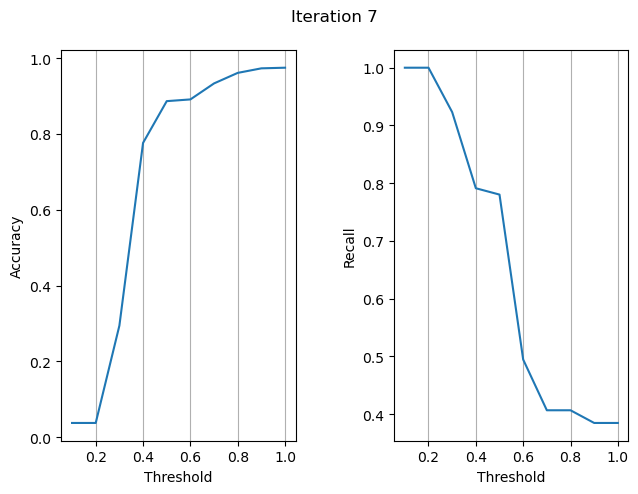

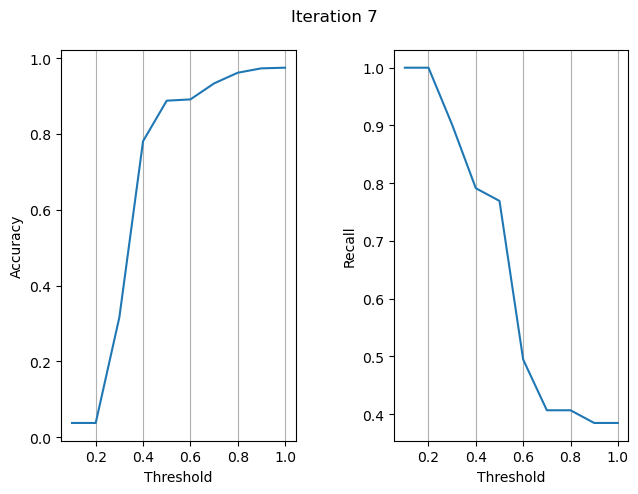

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3142857142857143, 0.9010989010989011], [0.7788819875776397, 0.7912087912087912], [0.8873706004140787, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.30890269151138716, 0.9010989010989011], [0.7788819875776397, 0.7912087912087912], [0.8873706004140787, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3490683229813665, 0.8681318681318682], [0.7821946169772257, 0.7912087912087912], [0.8886128364389234, 0.7692307692307693], [0.8910973084886128, 0.

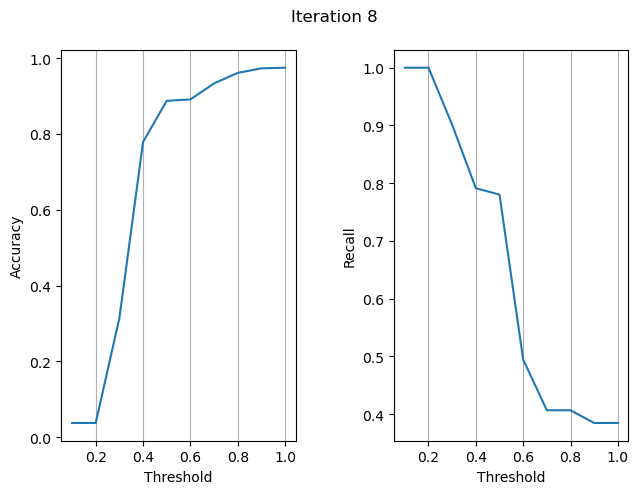

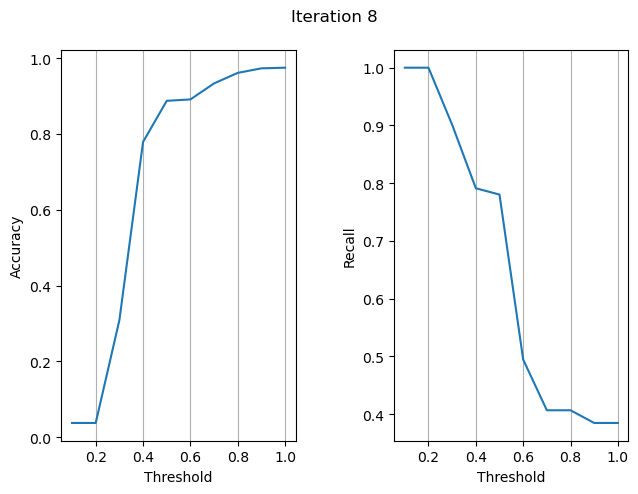

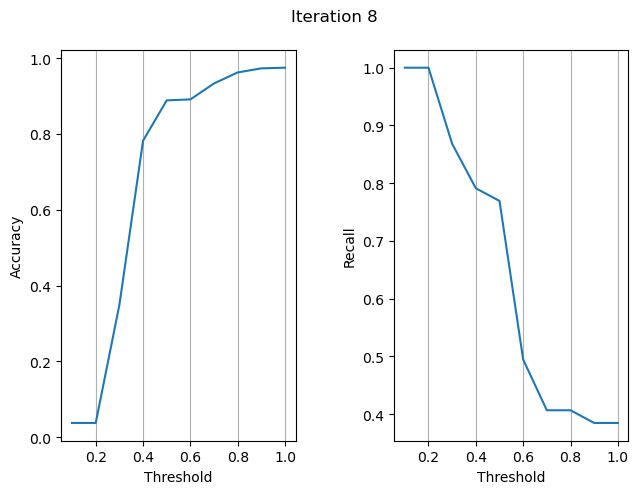

[[[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3175983436853002, 0.9010989010989011], [0.7813664596273292, 0.7912087912087912], [0.8873706004140787, 0.7692307692307693], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.27701863354037265, 0.9230769230769231], [0.7697722567287785, 0.7912087912087912], [0.8853002070393374, 0.7802197802197802], [0.8910973084886128, 0.4945054945054945], [0.9333333333333333, 0.4065934065934066], [0.9610766045548654, 0.4065934065934066], [0.9730848861283644, 0.38461538461538464], [0.9747412008281573, 0.38461538461538464]], [[0.03768115942028986, 1.0], [0.03768115942028986, 1.0], [0.3146997929606625, 0.9010989010989011], [0.7813664596273292, 0.7912087912087912], [0.8877846790890269, 0.7802197802197802], [0.8910973084886128, 0.

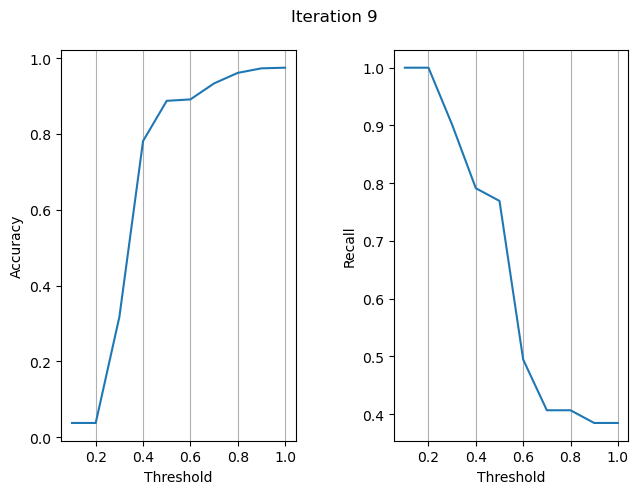

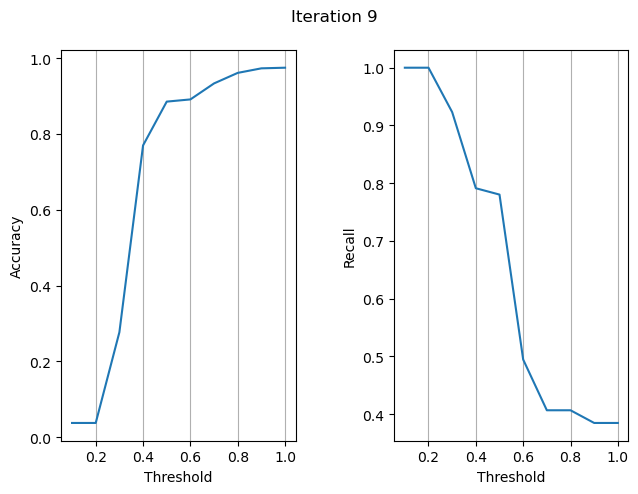

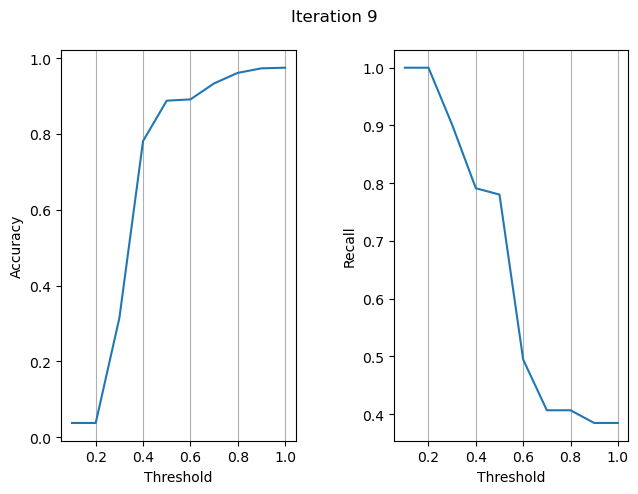

In [2]:
#Hyperparameter tuning using accuracy and recall for dropout rate
#Number of hidden layers is tuned by comparing reconstruction loss, accuracy and recall from all 4 python files for the
#different numbers of hidden layers
from tensorflow.keras import Sequential
from keras.layers import *
from keras.losses import MeanSquaredLogarithmicError
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.constraints import MaxNorm
import random
from sklearn.metrics import recall_score,accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

#read train data
data_path = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_train_data.xlsx'
df_normal = pd.read_excel(data_path,sheet_name='Train')
X = df_normal.drop(['target'], axis=1)
print(X.shape)

#scale train data
scaler = MinMaxScaler()
scaler.fit(X)
data = scaler.transform(X)

#read validation data
data_path_test = r'C:\Users\name\OneDrive\Documents\Computer Science Masters\Independent Research Project\Summative Assessment\Artefact Directory\cnp_validation_data.xlsx'
df_hasanomalies = pd.read_excel(data_path_test,sheet_name='Validation')
X_test = df_hasanomalies.drop(['target'], axis=1)

#scale validation data
data_test = scaler.transform(X_test)

#define range of dropout rate values for each dropout layer
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate3 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate4 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate5 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate6 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

#choose a random combination of dropout rate values 10 times
accuracy_recall_list = []
dropout_rate_sets = []
count=0
while count<10:
    dr = random.choice(dropout_rate)
    dr1 = random.choice(dropout_rate1)
    dr2 = random.choice(dropout_rate2)
    dr3 = random.choice(dropout_rate3)
    dr4 = random.choice(dropout_rate4)
    dr5 = random.choice(dropout_rate5)
    dr6 = random.choice(dropout_rate6)
    
    #Check if hyperparameter set was used before with this number of dense layers
    dropout_rate_set = [dr,dr1,dr2,dr3,dr4,dr5,dr6]
    
    count_set = dropout_rate_sets.count(dropout_rate_set)
    print(count_set)
    
    if count_set > 0:
        
        continue
        
    else:
        
        dropout_rate_sets.append(dropout_rate_set)
    
    #for the current combination of dropout rate values selected, run the Autoencoder 3 times
    recon_loss_avg = 0
    three_accuracy_recall = []
    for j in range(3):

        callback = tf.keras.callbacks.EarlyStopping(monitor='binary_crossentropy', patience=3)
        
        encoder = Sequential()
        encoder.add(Input(shape=(25,)))
        encoder.add(Dense(16-3,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(5)))
        encoder.add(Dropout(0.1))
        encoder.add(Dense(13-2,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(2)))
        encoder.add(Dropout(0))
        encoder.add(Dense(10+1,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(5)))
        encoder.add(Dropout(0.8))
        encoder.add(Dense(4+0,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(2)))

        decoder = Sequential()
        decoder.add(Dense(6+2,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(4)))
        decoder.add(Dropout(0.7))
        decoder.add(Dense(10+3,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(5)))
        decoder.add(Dropout(0.0))
        decoder.add(Dense(13+0,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(1)))
        decoder.add(Dropout(0.9))
        decoder.add(Dense(18-1,activation='relu',kernel_initializer='he_normal', kernel_constraint=MaxNorm(5)))
        decoder.add(Dropout(0.9))
        decoder.add(Dense(25,activation='sigmoid'))

        autoencoder = Sequential([encoder,decoder])
        autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.losses.BinaryCrossentropy()]) #FILL IN BRACKETS
        autoencoder.fit(data,data, batch_size=10, epochs=50, verbose=0, callbacks=[callback])
        
        pred_data_norm = autoencoder.predict(data)
        reconstruction_error_norm_AUTO = tf.keras.losses.BinaryCrossentropy()
        recon_loss = reconstruction_error_norm_AUTO(pred_data_norm,data).numpy()
        recon_loss_avg += recon_loss

        pred_data_test = autoencoder.predict(data_test)
        reconstruction_error_test = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
        reconstruction_error_test = reconstruction_error_test(pred_data_test,data_test)

        accuracy_recall = []

        #store a separate list for accuracy and recall and place into a main accuracy_recall list for 10 threshold value
        #starting from training data recon loss + 0.1 incrementing by 0.1 each time
        for j in range(1,11,1):
            threshold = recon_loss + (0.1*j)
            pred_test = tf.math.less(reconstruction_error_test, threshold)
            pred_test = [1 if i==False else 0 for i in pred_test]

            accuracy = accuracy_score(df_hasanomalies['target'], pred_test)
            recall = recall_score(df_hasanomalies['target'], pred_test)

            accuracy_recall.append([accuracy,recall])
        
        #store accuracy_recall list in another list which will be stored in a main list
        three_accuracy_recall.append(accuracy_recall)

    #average training reconstruction loss
    recon_loss_avg = recon_loss_avg/3
    print(recon_loss_avg)
    print("+1")
    #store accuracy and recall results for this dropout rate combination in main list accuracy_recall_list for comparing results
    #between different dropout rate combinations
    accuracy_recall_list.append(three_accuracy_recall)
    count+=1

print(accuracy_recall_list)
print(dropout_rate_sets)

#for each of the 10 dropout rate combination selected, plot the accuracy and recall graphs for the 3 times the Autoencoder
#was run
iter_num=0
for elm in accuracy_recall_list:
    print(elm)
    x = [x/10 for x in list(range(1,11,1))]
    y = elm
    print("dropout rate set:")
    print(dropout_rate_sets[iter_num])
    for i in range(len(y)):
        figure, axis = plt.subplots(1, 2)
        figure.suptitle("Iteration "+str(iter_num))
        figure.tight_layout(w_pad=4.0)
        axis[0].plot(x,[pt[0] for pt in y[i]])
        axis[0].grid(axis = 'x')
        axis[0].set(xlabel="Threshold",ylabel="Accuracy")
        axis[1].plot(x,[pt[1] for pt in y[i]])
        axis[1].grid(axis = 'x')
        axis[1].set(xlabel="Threshold",ylabel="Recall")
        print('Accuracy & Recall by threshold:')
        print(y[i])
    plt.show()
    iter_num+=1
